In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading Data

Data Source: https://www.kaggle.com/datasets/pentakrishnakishore/bank-customer-churn-data?resource=download&select=churn_prediction.csv

In [2]:
data = pd.read_csv('../data/BankChurn/churn_prediction.csv')

In [3]:
data.shape

(28382, 21)

In [4]:
data.head(5)

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

# Data Preprocessing and Exploratory Analysis

Summary:

*    **Customer id**: unique numbers assigned to customers. It is are okay as Integer.

*    **branch code**: represents different branches, therefore it should be **convereted to category**.

*    **Age** and **Vintage**: represent age and **how long of relationship** between customers and the bank, so we are okay with them as integers.

*    **customer_networth_category** is supposed to be an ordinal category, **should be converted to category**.

*    **churn** : 1 represents the churn and 0 represents not churn. However, there is no comparison between these two categories. This **needs to be converted to category datatype**.


*    **gender**: Gender of the customer. **Need to be encoded for further machine learning models**
*    **dependents**: Number of dependents the customer has. **Should be whole number instead of float**
*    **occupation**: The occupation of the customer. **Personally, I will encode this as well, then map it later**
*    **city**: City in which the customer is located. **The dataset already came with city code, so we can convert it to Category**


*    **current_balance**: Current balance in the customer's account.
*    **previous_month_end_balance**: Account balance at the end of the previous month.
*    **average_monthly_balance_prevQ**: Average monthly balance in the **previous quarter**.
*    **average_monthly_balance_prevQ2**: Average monthly balance in the **second previous quarter**.


*    **current_month_credit**: Credit amount in the current month.
*    **previous_month_credit**: Credit amount in the previous month.

*    **current_month_debit**: Debit amount in the current month.
*    **previous_month_debit**: Debit amount in the previous month.


*    **current_month_balance**: Account balance in the current month.
*    **previous_month_balance**: Account balance in the previous month.
*    **last_transaction**: **Timestamp** of the customer's last transaction. **Split into further**

In [6]:
data['churn'] = data['churn'].astype('category')
data['branch_code'] = data['branch_code'].astype('category')
data['customer_nw_category'] = data['customer_nw_category'].astype('category')
data['dependents'] = data['dependents'].astype('Int64')
data['city'] = data['city'].astype('category')

# Encode later for ML, for now, keep it as category
data['gender'] = data['gender'].astype('category')
data['occupation'] = data['occupation'].astype('category')

data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [7]:
# creating an instance(date) of DatetimeIndex class using "last_transaction"
date = pd.DatetimeIndex(data['last_transaction'])

# last day of year when transaction was done
data['doy_ls_tran'] = date.dayofyear

# week of year when last transaction was done
data['woy_ls_tran'] = date.weekofyear

# month of year when last transaction was done
data['moy_ls_tran'] = date.month

# day of week when last transaction was done
data['dow_ls_tran'] = date.dayofweek

data = data.drop(columns = ['last_transaction'])
print (data.head(5))
data.dtypes

   customer_id  vintage  age gender  dependents     occupation    city  \
0            1     2101   66   Male           0  self_employed   187.0   
1            2     2348   35   Male           0  self_employed     NaN   
2            4     2194   31   Male           0       salaried   146.0   
3            5     2329   90    NaN        <NA>  self_employed  1020.0   
4            6     1579   42   Male           2  self_employed  1494.0   

  customer_nw_category branch_code  current_balance  ...  \
0                    2         755          1458.71  ...   
1                    2        3214          5390.37  ...   
2                    2          41          3913.16  ...   
3                    2         582          2291.91  ...   
4                    3         388           927.72  ...   

   previous_month_credit  current_month_debit  previous_month_debit  \
0                   0.20                 0.20                  0.20   
1                   0.56              5486.27       

redacted

customer_id                          int64
vintage                              int64
age                                  int64
gender                            category
dependents                           Int64
occupation                        category
city                              category
customer_nw_category              category
branch_code                       category
current_balance                    float64
previous_month_end_balance         float64
average_monthly_balance_prevQ      float64
average_monthly_balance_prevQ2     float64
current_month_credit               float64
previous_month_credit              float64
current_month_debit                float64
previous_month_debit               float64
current_month_balance              float64
previous_month_balance             float64
churn                             category
doy_ls_tran                        float64
woy_ls_tran                        float64
moy_ls_tran                        float64
dow_ls_tran

Since customer_id do not contribute information, we will skip the analysis of its distribution

In [8]:
# seggregating variables into groups
customer_details = ['age','vintage']
current_month = ['current_balance','current_month_credit','current_month_debit','current_month_balance']
previous_month = ['previous_month_end_balance','previous_month_credit','previous_month_debit','previous_month_balance']
previous_quarters = ['average_monthly_balance_prevQ','average_monthly_balance_prevQ2']
transaction_date = ['doy_ls_tran','woy_ls_tran','moy_ls_tran','dow_ls_tran']

In [9]:
# custom function for easy and efficient analysis of numerical univariate

def UVA_numeric(data, var_group):
  '''
  Univariate_Analysis_numeric
  takes a group of variables (INTEGER and FLOAT) and plot/print all the descriptives and properties along with KDE.

  Runs a loop: calculate all the descriptives of i(th) variable and plot/print it
  '''

  size = len(var_group)
  plt.figure(figsize = (7*size,3), dpi = 100)
  
  #looping for each variable
  for j,i in enumerate(var_group):
    
    # calculating descriptives of variable
    mini = data[i].min()
    maxi = data[i].max()
    ran = data[i].max()-data[i].min()
    mean = data[i].mean()
    median = data[i].median()
    st_dev = data[i].std()
    skew = data[i].skew()
    kurt = data[i].kurtosis()

    # calculating points of standard deviation
    points = mean-st_dev, mean+st_dev

    #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.kdeplot(data[i], shade=True)
    sns.lineplot(points, [0,0], color = 'black', label = "std_dev")
    sns.scatterplot([mini,maxi], [0,0], color = 'orange', label = "min/max")
    sns.scatterplot([mean], [0], color = 'red', label = "mean")
    sns.scatterplot([median], [0], color = 'blue', label = "median")
    plt.xlabel('{}'.format(i), fontsize = 20)
    plt.ylabel('density')
    plt.title('std_dev = {}; kurtosis = {};\nskew = {}; range = {}\nmean = {}; median = {}'.format((round(points[0],2),round(points[1],2)),
                                                                                                   round(kurt,2),
                                                                                                   round(skew,2),
                                                                                                   (round(mini,2),round(maxi,2),round(ran,2)),
                                                                                                   round(mean,2),
                                                                                                   round(median,2)))

# customer details

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

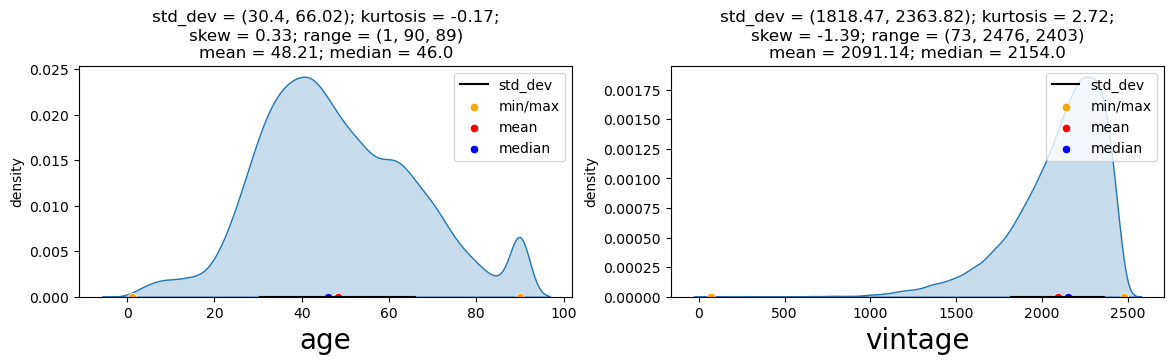

In [10]:
UVA_numeric(data,customer_details)

As we can see, the age distribution resemble a normal distribution with:

* The **mean** age of customers are 48. This is roughly the same average age of Canadians, which is standing at 41 (https://www.statista.com/statistics/444844/canada-median-age-of-resident-population/).
* Weirdly, there are clients with **less than legal age**. More specifically, children from 1 to 12 years old. While it is possible for parents to open bank account for their children from the young age, considering the financial literacy (https://hillnotes.ca/2019/05/09/the-state-of-financial-literacy-in-canada-how-much-do-we-know/) level of Canadians, it is unlikely suspicious and therefore, it worths **further look**
* The one standard deviation is at 30.4-66.02 years of age. Meaning the main bulk of their clients are well advanced in their career, likely to have children and should be **ideal** for advacned financial products like investment and insurance.

As we can see, the vintage distribution resemble a left-skewed distribution:
* The **mean** vintage stands at 2091 days, translating to roughly ~5.7 years. Without further information for the bank sector in Canada, I cannot claim further insight. However, based on a CNBC article in 2023 for US banks (https://www.cnbc.com/select/brick-and-mortar-banks-vs-online-banks/), the average vintage of client accounts are 17 years. 
* --> This raises 2 possible scenario. **Either the bank is relatively new, or the retention rate at this bank is very bad**. Since the max vintage age is 2403 days, it is more likely to be the former.
* Kurtosis = **2.93**: Extreme values and Outliers are very likely to be present in vintage

# current month

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

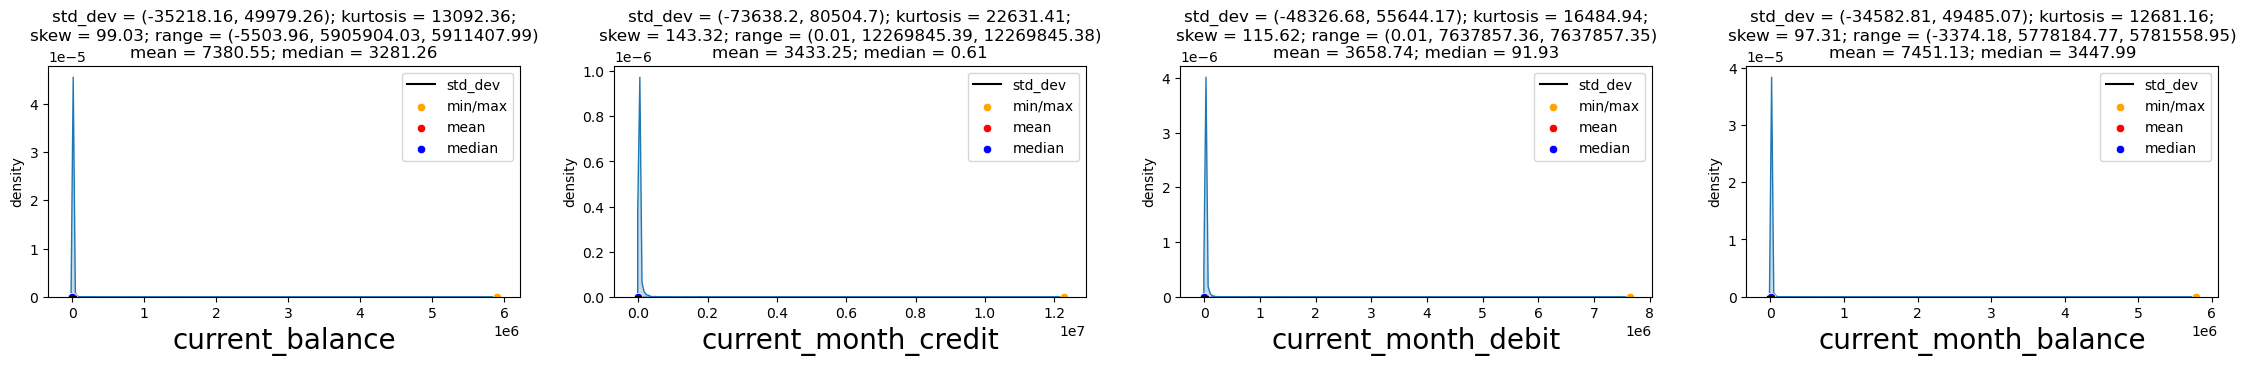

In [11]:
UVA_numeric(data,current_month)

There is not much to examine here, as it is clear that all of these are right-skewed distribution

# Previous Quarter

**Since monthly transactions tends to be the same, let's check on quarterly**

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

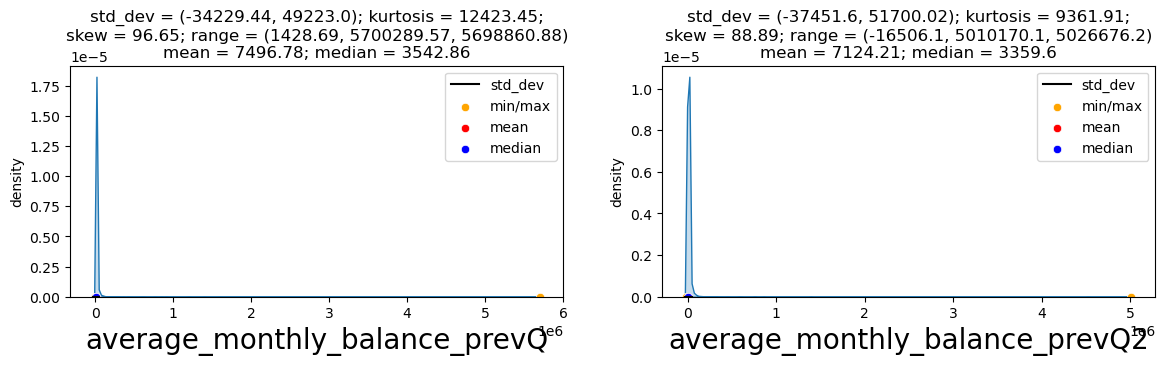

In [12]:
UVA_numeric(data,previous_quarters)

Again, there is not much to examine here, as it is clear that all of these are right-skewed distribution.

* One notable thing we can see is the wide gap of wealth distribution. For instance, for the prevQ2 graph, while the poorest client is 16,500 dollar in debt, the richest person held over 5 millions dollars with the mean only stayed at the low of 7,000 and the median at 3,359.

# transaction date 

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: Futu

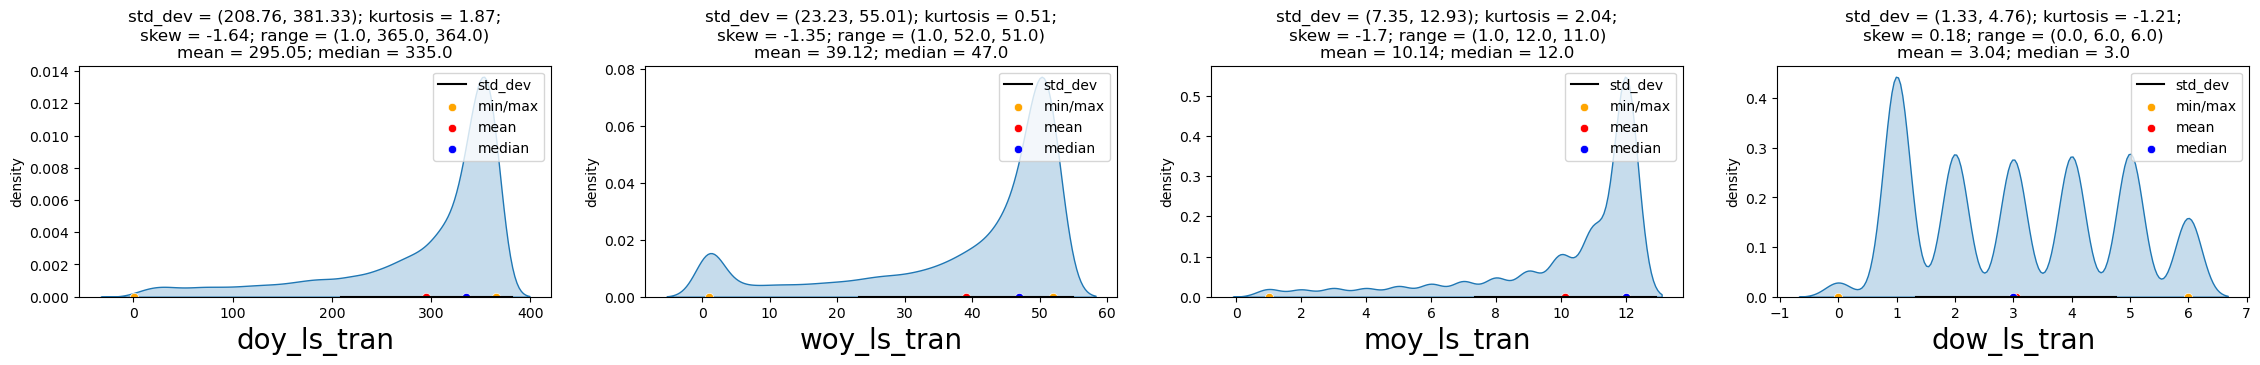

In [13]:
UVA_numeric(data,transaction_date)

**Summary**
*    **Day_of_Year**:
    *    Most of the last transactions were made in the last 60 days of the extraction year of our data.
    *    There are transactions which were made also an year ago.

*   **Week_of_year and Month_of_year**: these variable validate the findings from the **day_of_year**.
*    **Day_of_Week**: Tuesdays are often the favoured day relative to others. No suprise that Saturday and Sunday are at the lower end.

**Things to investigate further Down**
*    **Customers whose last transaction was more than 6 months ago, did all of them churn?**

In [14]:
# Custom function for easy visualisation of Categorical Variables
def UVA_category(data, var_group):

  '''
  Univariate_Analysis_categorical
  takes a group of variables (category) and plot/print all the value_counts and barplot.
  '''
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


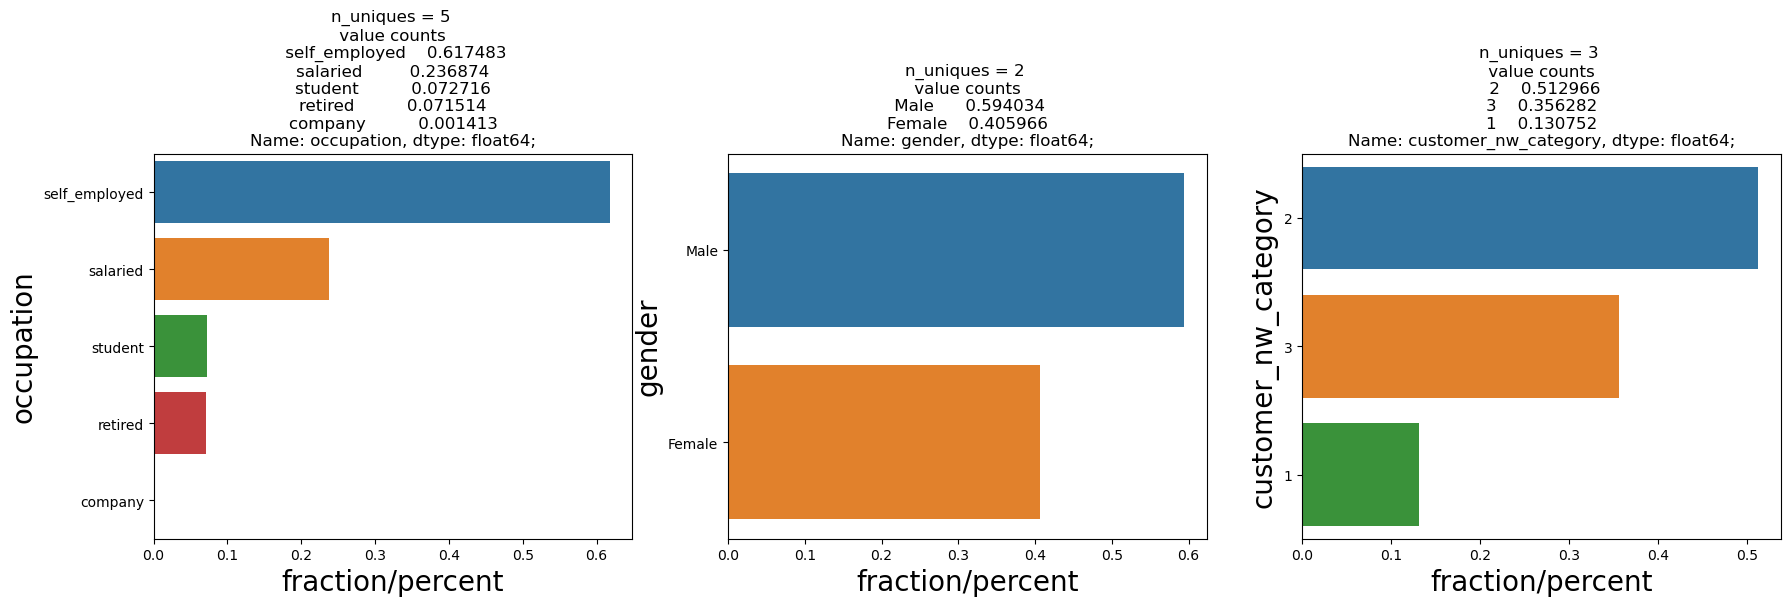

In [15]:
UVA_category(data, ['occupation', 'gender', 'customer_nw_category'])

* **Strangely** enough, most of the clients are identified as "self-employed" with barely any cooperation clients. Thus, it is clear that this is an ***Unsual*** retail bank.
* There is a high number of male clients compared to female ones, which accounts for 59.4% of the total.
* With less than 15% of clients listed as highest tier and only slightly over 50% of clients are middle class tier 2, this bank client set is interesting and **unsual**. To be specific, if you look at the chart below obtained from the US FED (https://www.federalreserve.gov/releases/z1/dataviz/dfa/distribute/chart/), wealth distribution for the above 50% percentiles are over 90% of the total. 
* Thus, if possible, we need more clarification on how the bank rank their client networth into these 3 categories.


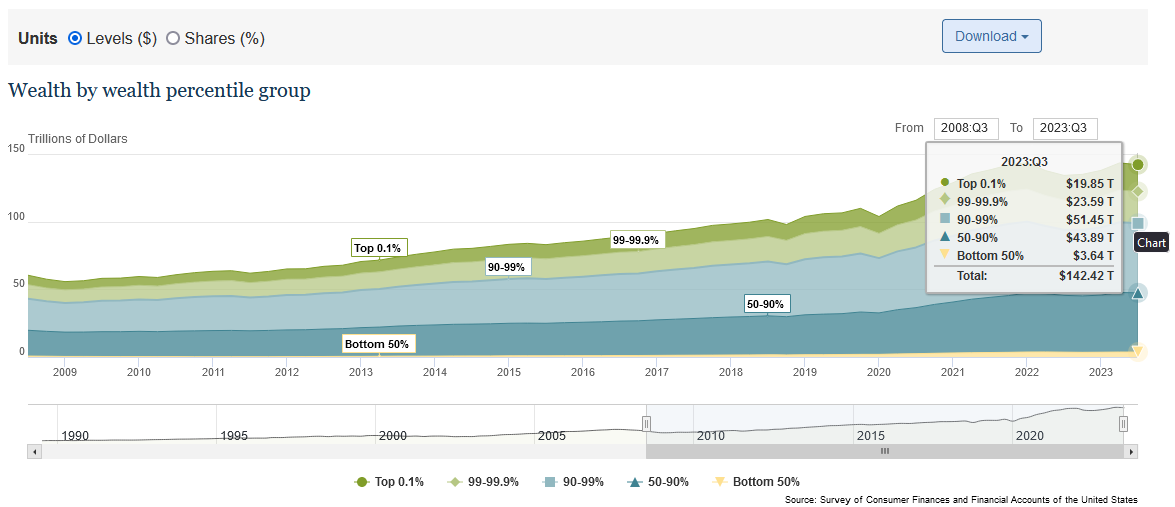

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


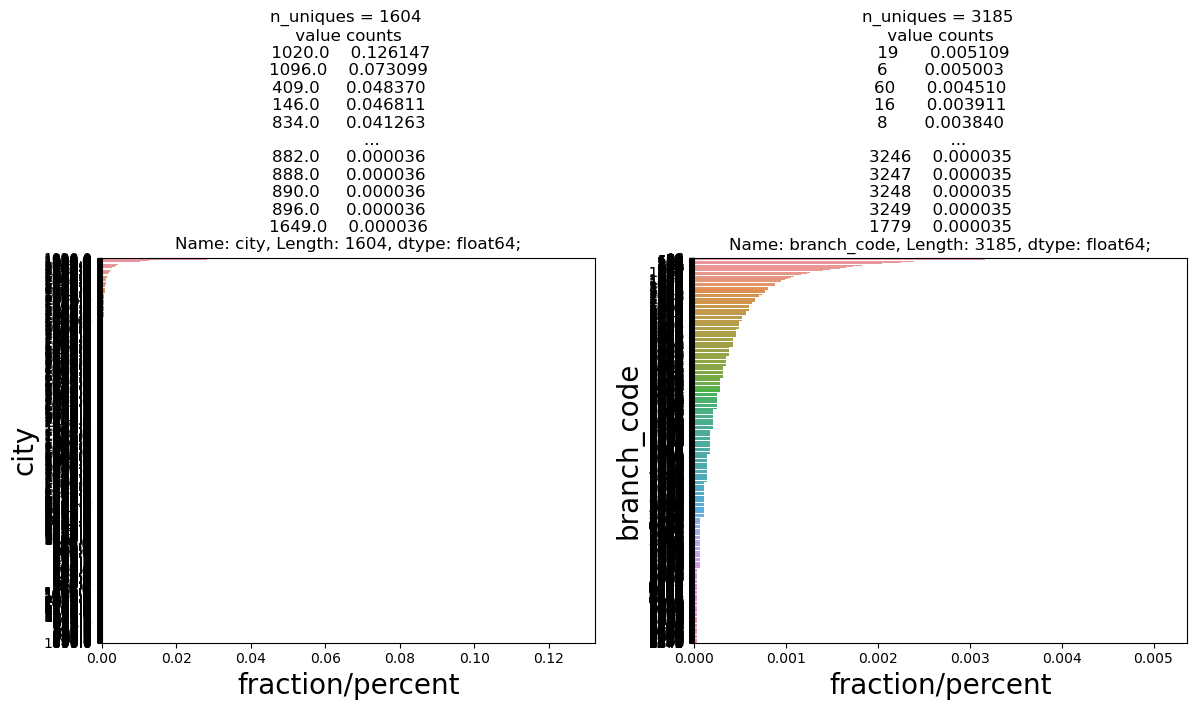

In [16]:
UVA_category(data, ['city', 'branch_code'])

While there are too many cities and branches for us to see clearly, it is clear that **majority of revenue and transactions are concentrated at the very few upper 5-10 percentiles**.

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


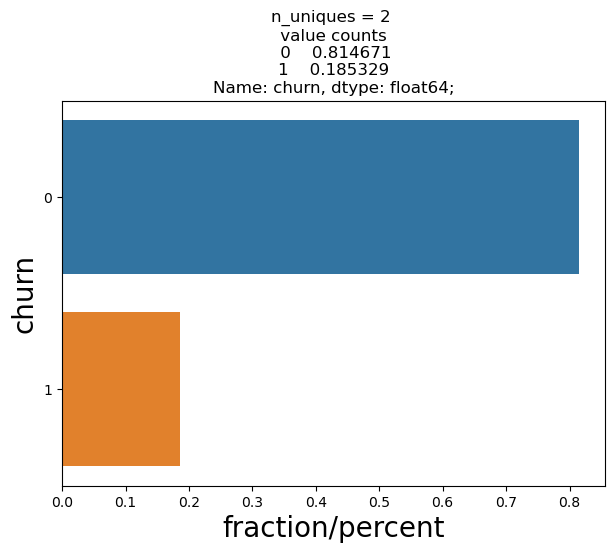

In [17]:
UVA_category(data, ['churn'])

* Number of people who churned are about 1/4 times of the people who did not churn in the given data.
* Standing at 18.5%, the churn/attrition rate is high for this bank. According to a quick Google search (https://uxpressia.com/blog/how-to-approach-customer-churn-measurement-in-banking), "financial institutions with binding contracts are said to have attrition rates of 5-7%. The numbers can go up to **25-30% for credit or debit cards**", however, "according to recent studies, it is generally believed that an annual churn rate of **less than 5-10%** is acceptable for banks"

**Summary of things to do**: 
* calculate the churn rate for this month, this quarter and previous 2 quarter
* Customers whose last transaction was more than 6 months ago, did all of them churn?
* Weirdly, there are clients with less than legal age. More specifically, children from 1 to 12 years old. While it is possible for parents to open bank account for their children from the young age, considering the financial literacy (https://hillnotes.ca/2019/05/09/the-state-of-financial-literacy-in-canada-how-much-do-we-know/) level of Canadians, it is unlikely suspicious and therefore, it worths further look

# Calculate the churn rate for this month, this quarter and previous 2 quarter

In [18]:
# Churn rate for this month, which is the last month of the year
this_month_churn_rate = data['churn'][data['moy_ls_tran'] == 12].astype('int').sum() / data[data['moy_ls_tran'] == 12].shape[0]
this_month_churn_rate

0.20107962213225372

At **20% for this month**, and based on the chart we saw above, clearly this month has a high impact to the 18.5% average attrition rate of the bank

In [19]:
# Churn rate for last quarter
prev_quarter_churn_rate = data['churn'][(data['moy_ls_tran'] >= 7) & (data['moy_ls_tran'] <= 9)].astype('int').sum() / data[(data['moy_ls_tran'] >= 7) & (data['moy_ls_tran'] <= 9)].shape[0]
prev_quarter_churn_rate

0.18600478468899523

In [20]:
# Churn rate for 2 previous quarter
prev_2_quarters_churn_rate = data['churn'][(data['moy_ls_tran'] >= 4) & (data['moy_ls_tran'] <= 6)].astype('int').sum() / data[(data['moy_ls_tran'] >= 4) & (data['moy_ls_tran'] <= 6)].shape[0]
prev_2_quarters_churn_rate

0.14269725797425853

As can be seen, as churn rate situation got worse as we move along the year. From the average of **14.2% in the 2 previous quarter**, it went up to **18.6% in the last quarter**.

# Customers whose last transaction was more than 6 months ago, did all of them churn?

In [21]:
from datetime import datetime, timedelta

# Find customers whose last transaction was more than 6 months ago
inactive_customers = data[data['moy_ls_tran'] <= 6]

# Check if all inactive customers churned
did_all_inactive_churn = inactive_customers['churn'].astype('int').all()
print("Did all inactive over 6 months churn? ", did_all_inactive_churn)
print("If no, what is the churn rate, aka churn rate first half of the year? ", inactive_customers['churn'].astype('int').sum() / inactive_customers['churn'].shape[0])

Did all inactive over 6 months churn?  False
If no, what is the churn rate, aka churn rate first half of the year?  0.1355170199100835


Clearly, the churn rate for the first half of the year was relatively low for this bank, which is close to the ideal 10% of US banks. **Some major negative events must have happened during the 2nd half** of the year for this bank!!!

# Client that is too young

In [22]:
# Find clients with ages between 1 to 12
children_clients = data[(data['age'] >= 1) & (data['age'] <= 12)]
children_clients

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
34,37,2119,9,Male,0,student,623.0,2,512,4065.35,...,0.34,0.34,0.34,4065.35,4065.35,0,NaN,NaN,NaN,NaN
47,50,1944,4,Male,0,student,318.0,3,1314,5717.13,...,0.10,107.26,0.10,5700.39,5752.87,0,205.0,30.0,7.0,2.0
115,120,2234,10,Female,0,student,1185.0,3,2196,107.99,...,0.57,714.86,2143.43,526.71,2043.47,1,265.0,38.0,9.0,6.0
133,141,2346,3,Female,<NA>,student,1232.0,2,2202,1863.74,...,0.64,0.64,0.64,1863.74,1863.74,0,NaN,NaN,NaN,NaN
200,216,1641,3,Female,<NA>,student,575.0,1,622,4163.26,...,0.07,0.07,0.07,4163.26,4163.26,0,165.0,24.0,6.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28098,29996,1997,3,Male,<NA>,student,1096.0,1,483,1839.50,...,0.27,0.27,0.27,1839.50,1839.50,0,177.0,26.0,6.0,2.0
28120,30019,2035,8,Female,0,student,1525.0,3,358,145.41,...,0.37,143.23,19009.50,145.41,2321.40,1,266.0,39.0,9.0,0.0
28198,30107,2201,2,Female,0,student,1096.0,2,1000,7453.26,...,0.63,0.63,0.63,6268.53,5530.22,0,355.0,51.0,12.0,5.0
28241,30152,1808,12,Male,<NA>,student,1438.0,3,528,8237.18,...,5714.50,0.21,0.21,9002.20,4962.52,1,348.0,50.0,12.0,5.0


In [23]:
children_clients['dependents'].unique()

<IntegerArray>
[0, <NA>]
Length: 2, dtype: Int64

For children, it makes no sense for them to have dependents, so we will **fill it with 0**

In [24]:
children_clients['dependents'] = children_clients['dependents'].fillna(0).astype('category')
children_clients['dependents'].unique()

redacted

[0]
Categories (1, Int64): [0]

In [25]:
children_clients['occupation'].unique()

['student', 'self_employed', 'salaried', 'company']
Categories (5, object): ['company', 'retired', 'salaried', 'self_employed', 'student']

E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


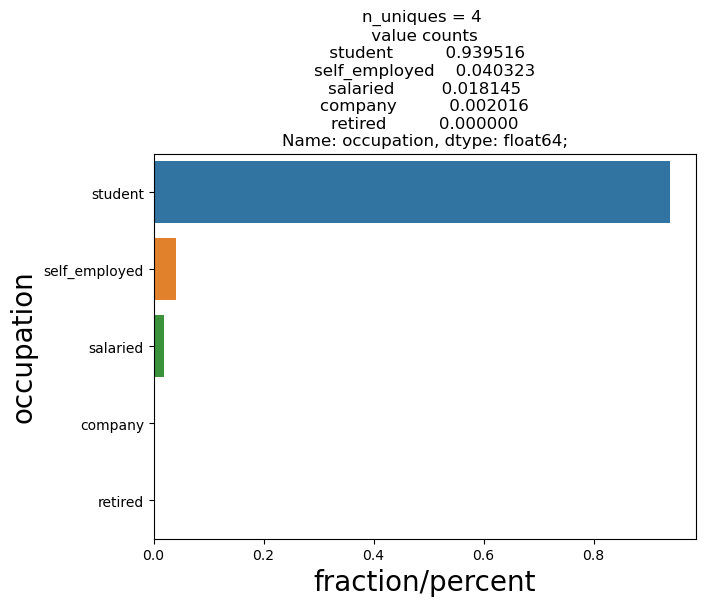

In [26]:
UVA_category(children_clients, ['occupation'])

Clearly, there are many suspicious accounts, where children under 12 are listed as "salaried" or "company". Furthermore, while it is possible for special children under 12 having their own side hustle "self employed", it is extremely rare. Thus, I am *highly concerned* there are **potential illegal money flow** at this bank through these children accounts!!!

In [27]:
# Update the 'data' DataFrame with modified 'children_clients' for the 'dependents' column
data.update(children_clients[['dependents']])
data[(data['age'] >= 1) & (data['age'] <= 12)]['dependents'].unique()

array([0], dtype=object)

In [28]:
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,Male,0,self_employed,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,Male,0,self_employed,NaN,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,Male,0,salaried,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,NaN,<NA>,self_employed,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0
4,6,1579,42,Male,2,self_employed,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0,student,1020.0,2,1207,1076.43,...,0.30,0.30,0.30,1076.43,1076.43,0,295.0,43.0,10.0,1.0
28378,30298,1537,34,Female,0,self_employed,1046.0,2,223,3844.10,...,2.29,901.00,1014.07,3738.54,3690.32,0,351.0,51.0,12.0,1.0
28379,30299,2376,47,Male,0,salaried,1096.0,2,588,65511.97,...,3883.06,168.23,71.80,61078.50,57564.24,1,365.0,1.0,12.0,1.0
28380,30300,1745,50,Male,3,self_employed,1219.0,3,274,1625.55,...,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN,NaN


# Heatmap

redacted

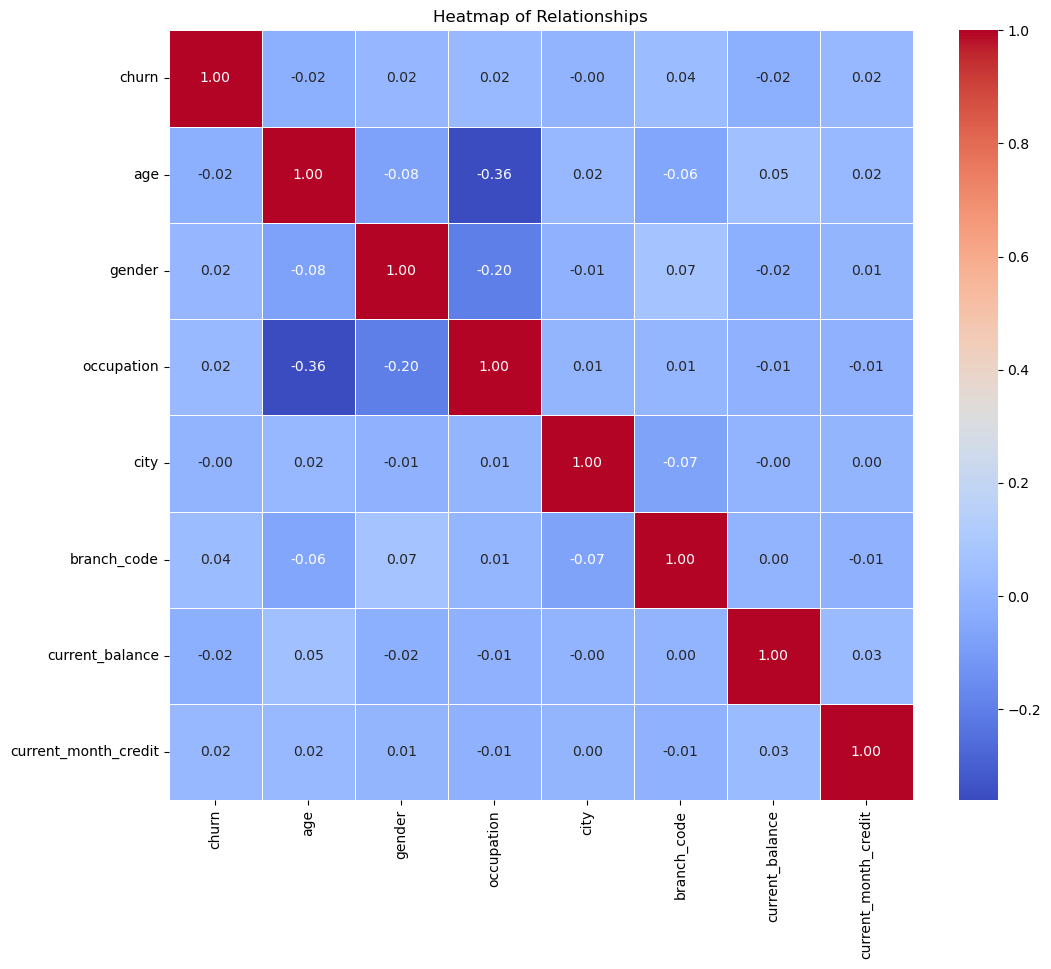

In [29]:
# Select relevant columns for the heatmap
heatmap_data = data[['churn', 'age', 'gender', 'dependents', 'occupation', 'city', 'branch_code', 'current_balance', 'current_month_credit']]

# Convert categorical columns to numerical representation for correlation calculation
heatmap_data_encoded = heatmap_data.copy()
for column in heatmap_data_encoded.select_dtypes(include='category').columns:
    heatmap_data_encoded[column] = heatmap_data_encoded[column].cat.codes

# Calculate correlation matrix
correlation_matrix = heatmap_data_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Relationships')
plt.show()

# Data preprocessing

In [30]:
# Save a backup in case wrong data preprocessing
temp_df = data.copy()

In [31]:
# data = temp_df

In [32]:
from sklearn.preprocessing import LabelEncoder

gender_label_encoder = LabelEncoder()
occupation_label_encoder = LabelEncoder()

In [33]:
data

data['gender'] = gender_label_encoder.fit_transform(data['gender'])
data['occupation'] = occupation_label_encoder.fit_transform(data['occupation'])

data[['gender', 'occupation']]

,gender,occupation
0,1,3
1,1,3
2,1,2
3,2,3
4,1,3
...,...,...
28377,0,4
28378,0,3
28379,1,2
28380,1,3


In [34]:
data.isna()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True
3,False,False,False,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28378,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28379,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28380,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,True,True,True


In [35]:
columns_with_missing_values = data.columns[data.isna().any()].tolist()

# Display the columns with missing values
print("Columns with missing values:", columns_with_missing_values)

Columns with missing values: ['dependents', 'city', 'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran']


Strategy to fill NA:
* Dependent: fill based on their associate city and occupation average
* City: deduct from branch code since other rows with the same branch code should have city value
* For  'doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran':  use KNN cluster to fill


* **Since the strat to fill dependent** relies on city column, we will fill city **first**

In [36]:
data['city'].isna().sum()

803

In [37]:
data['city'] = data['city'].cat.as_ordered()

# Fill 'city' by deducing from 'branch_code'
branch_code_mapping = data.groupby('branch_code')['city'].max().to_dict()
data['city'] = data['city'].fillna(data['branch_code'].map(branch_code_mapping))
data['city'].isna().sum()

40

In [38]:
suspicious_cities = data[data['city'].isna()].copy()
suspicious_cities

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
370,397,2091,70,0,0,3,NaN,2,3192,1660.27,...,0.30,0.30,256.50,1660.27,1891.68,0,200.0,29.0,7.0,4.0
735,785,2175,31,1,0,2,NaN,3,2156,4053.28,...,0.10,139.03,0.10,4262.04,4445.67,0,177.0,26.0,6.0,2.0
739,789,1827,41,1,3,3,NaN,2,3225,3288.61,...,0.07,941.03,566.74,2527.27,2712.98,0,358.0,52.0,12.0,1.0
1087,1161,2382,45,0,<NA>,3,NaN,2,2552,5539.23,...,0.21,0.21,0.21,5539.23,5539.23,0,NaN,NaN,NaN,NaN
1143,1219,1774,33,1,0,3,NaN,3,1965,3332.19,...,392.93,0.07,0.07,3258.30,2673.20,0,342.0,49.0,12.0,6.0
1672,1795,2170,26,0,0,2,NaN,3,1932,1493.62,...,0.57,586.29,0.57,1718.74,1729.33,0,356.0,51.0,12.0,6.0
2204,2362,2195,40,1,2,2,NaN,2,2716,9985.02,...,0.07,32.30,32.20,9996.28,10025.65,0,348.0,50.0,12.0,5.0
2843,3032,1668,53,1,3,2,NaN,3,4224,3079.21,...,0.37,3448.04,46.74,3792.55,6705.81,0,230.0,33.0,8.0,6.0
5698,6072,2433,52,0,2,3,NaN,3,4015,3173.76,...,0.63,1429.20,2972.06,4553.07,5758.16,0,110.0,16.0,4.0,5.0
6259,6677,2016,28,1,0,4,NaN,3,3258,57.54,...,7828.66,2634.62,8242.26,1815.10,3534.90,0,340.0,49.0,12.0,4.0


Since we have 40 unknown cities left, it means there is no branch associate with this list of cities. **potential fraud here so we removed it into separate files for further investigation**

In [39]:
data.dropna(subset=['city'], inplace=True)
data['city'].isna().sum()

0

In [40]:
data['dependents'].isna().sum()

2364

In [41]:
# Fill 'dependents' based on their associated city and occupation average
dependents_fill_values = data.groupby(['city', 'occupation'])['dependents'].transform('mean')
dependents_fill_values = round(dependents_fill_values).astype('Int64')
print ("Dependent values: ", dependents_fill_values)
data['dependents'].fillna(dependents_fill_values, inplace=True)
data

Dependent values:  0        1
1        0
2        0
3        0
4        1
        ..
28377    0
28378    0
28379    0
28380    1
28381    0
Name: dependents, Length: 28342, dtype: Int64


,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,1,0,3,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.0,21.0,5.0,1.0
1,2,2348,35,1,0,3,1449.0,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.0,44.0,11.0,4.0
2,4,2194,31,1,0,2,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,NaN,NaN,NaN,NaN
3,5,2329,90,2,0,3,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,218.0,32.0,8.0,1.0
4,6,1579,42,1,2,3,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.0,44.0,11.0,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,0,0,4,1020.0,2,1207,1076.43,...,0.30,0.30,0.30,1076.43,1076.43,0,295.0,43.0,10.0,1.0
28378,30298,1537,34,0,0,3,1046.0,2,223,3844.10,...,2.29,901.00,1014.07,3738.54,3690.32,0,351.0,51.0,12.0,1.0
28379,30299,2376,47,1,0,2,1096.0,2,588,65511.97,...,3883.06,168.23,71.80,61078.50,57564.24,1,365.0,1.0,12.0,1.0
28380,30300,1745,50,1,3,3,1219.0,3,274,1625.55,...,0.20,0.20,0.20,1625.55,1625.55,0,NaN,NaN,NaN,NaN


In [42]:
# double check
data['dependents'].isna().sum()

257

In [43]:
avg_dependent = round(data['dependents'].mean())
avg_dependent

0

In [44]:
data['dependents'].fillna(avg_dependent, inplace=True)

data['dependents'].isna().sum()

0

Since we have 268 accounts unable to fill NA with that strategy, **with less than 1% accounts for the total accounts, we can use the average of the total sample** to fill it.

In [45]:
from sklearn.impute import KNNImputer

# Extract columns for KNN imputation
knn_cols = ['doy_ls_tran', 'woy_ls_tran', 'moy_ls_tran', 'dow_ls_tran']

# We have 12 months here, so we can generalize them by each month
knn_imputer = KNNImputer(n_neighbors=12)
data[knn_cols] = knn_imputer.fit_transform(data[knn_cols])
data

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,doy_ls_tran,woy_ls_tran,moy_ls_tran,dow_ls_tran
0,1,2101,66,1,0,3,187.0,2,755,1458.71,...,0.20,0.20,0.20,1458.71,1458.71,0,141.000000,21.000000,5.0000,1.000000
1,2,2348,35,1,0,3,1449.0,2,3214,5390.37,...,0.56,5486.27,100.56,6496.78,8787.61,0,305.000000,44.000000,11.0000,4.000000
2,4,2194,31,1,0,2,146.0,2,41,3913.16,...,0.61,6046.73,259.23,5006.28,5070.14,0,295.082955,39.118422,10.1435,3.042513
3,5,2329,90,2,0,3,1020.0,2,582,2291.91,...,0.47,0.47,2143.33,2291.91,1669.79,1,218.000000,32.000000,8.0000,1.000000
4,6,1579,42,1,2,3,1494.0,3,388,927.72,...,714.61,588.62,1538.06,1157.15,1677.16,1,307.000000,44.000000,11.0000,6.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,0,0,4,1020.0,2,1207,1076.43,...,0.30,0.30,0.30,1076.43,1076.43,0,295.000000,43.000000,10.0000,1.000000
28378,30298,1537,34,0,0,3,1046.0,2,223,3844.10,...,2.29,901.00,1014.07,3738.54,3690.32,0,351.000000,51.000000,12.0000,1.000000
28379,30299,2376,47,1,0,2,1096.0,2,588,65511.97,...,3883.06,168.23,71.80,61078.50,57564.24,1,365.000000,1.000000,12.0000,1.000000
28380,30300,1745,50,1,3,3,1219.0,3,274,1625.55,...,0.20,0.20,0.20,1625.55,1625.55,0,295.082955,39.118422,10.1435,3.042513


In [46]:
data[knn_cols].isna().sum()

doy_ls_tran    0
woy_ls_tran    0
moy_ls_tran    0
dow_ls_tran    0
dtype: int64

# Machine learning

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Assuming 'data' is your prepared DataFrame
# Extract features and target variable
X = data.drop(['churn'], axis=1)
y = data['churn']

# Handle categorical variables (one-hot encoding)
X_encoded = pd.get_dummies(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

    Linear Regression

In [47]:
# Initialize and train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions on the test set
lr_predictions = lr_model.predict(X_test)

# Evaluate the model
mse_lr = mean_squared_error(y_test, lr_predictions)
print(f"Linear Regression Mean Squared Error: {mse_lr}")

Linear Regression Mean Squared Error: 109063876595.62851


Since Linear Regression **performs too bad, it will be excluded** from Mix of Experts Model

    XGBoost

In [48]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

XGBoost Mean Squared Error: 0.13741400599753043


In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming 'y_test' and 'xgb_predictions' are available
accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")

XGBoost Accuracy: 0.8625859940024696
XGBoost Precision: 0.6726768377253814
XGBoost Recall: 0.4717898832684825
XGBoost F1 Score: 0.5546026300743282


    LightGBM

In [50]:
import lightgbm as lgb

# Initialize and train the LightGBM model
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, lgb_predictions)
print(f"LightGBM Mean Squared Error: {mse_lgb}")

LightGBM Mean Squared Error: 0.1324748632915858


In [51]:
# Assuming 'y_test' and 'lgb_predictions' are available
accuracy_lgb = accuracy_score(y_test, lgb_predictions)
precision_lgb = precision_score(y_test, lgb_predictions)
recall_lgb = recall_score(y_test, lgb_predictions)
f1_lgb = f1_score(y_test, lgb_predictions)

print(f"LightGBM Accuracy: {accuracy_lgb}")
print(f"LightGBM Precision: {precision_lgb}")
print(f"LightGBM Recall: {recall_lgb}")
print(f"LightGBM F1 Score: {f1_lgb}")

LightGBM Accuracy: 0.8675251367084141
LightGBM Precision: 0.7033773861967695
LightGBM Recall: 0.4659533073929961
LightGBM F1 Score: 0.5605617320070218


    MLP

In [53]:
# # Making predictions on the test set
# hidden_layer_input_test = np.dot(X_test_scaled, weights_input_hidden) + biases_hidden
# hidden_layer_output_test = sigmoid(hidden_layer_input_test)
# output_layer_input_test = np.dot(hidden_layer_output_test, weights_hidden_output) + biases_output
# mlp_predictions = (sigmoid(output_layer_input_test) >= 0.5).astype(int).flatten()

# # Evaluate the model
# mse_mlp = mean_squared_error(y_test, predictions.T)
# print(f"MLP Mean Squared Error: {mse_mlp}")
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the MLP model
mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=100)
mlp_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
mlp_predictions = mlp_model.predict(X_test_scaled)

# Evaluate the model
mse_mlp = mean_squared_error(y_test, mlp_predictions)
print(f"MLP Mean Squared Error: {mse_mlp}")

MLP Mean Squared Error: 0.25577703298641735


E:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


In [54]:
# Evaluate the MLP
accuracy_mlp = accuracy_score(y_test, mlp_predictions)
precision_mlp = precision_score(y_test, mlp_predictions)
recall_mlp = recall_score(y_test, mlp_predictions)
f1_mlp = f1_score(y_test, mlp_predictions)

print(f"MLP Accuracy: {accuracy_mlp}")
print(f"MLP Precision: {precision_mlp}")
print(f"MLP Recall: {recall_mlp}")
print(f"MLP F1 Score: {f1_mlp}")

MLP Accuracy: 0.7442229670135826
MLP Precision: 0.2639821029082774
MLP Recall: 0.22957198443579765
MLP F1 Score: 0.24557752341311134


MLP also performs **bad in relative to the to the 2 Gradient Boosting models**, so we **excluded** it too

    Mix of Expert

In [55]:
from sklearn.ensemble import VotingClassifier

# Assuming lr_model, xgb_model, lgb_model, mlp_model are already trained

# Create a Mix of Experts model using a soft voting approach
mix_of_experts_model = VotingClassifier(
    estimators=[
        ('xgb', xgb_model),
        ('lgb', lgb_model),
    ],
    voting='soft'
)

# Fit the Mix of Experts model on the training data
mix_of_experts_model.fit(X_train, y_train)

# Make predictions on the test set
mix_of_experts_predictions = mix_of_experts_model.predict(X_test)

# Evaluate the Mix of Experts model
accuracy_mix_of_experts = accuracy_score(y_test, mix_of_experts_predictions)
precision_mix_of_experts = precision_score(y_test, mix_of_experts_predictions)
recall_mix_of_experts = recall_score(y_test, mix_of_experts_predictions)
f1_mix_of_experts = f1_score(y_test, mix_of_experts_predictions)

print(f"Mix of Experts Accuracy: {accuracy_mix_of_experts}")
print(f"Mix of Experts Precision: {precision_mix_of_experts}")
print(f"Mix of Experts Recall: {recall_mix_of_experts}")
print(f"Mix of Experts F1 Score: {f1_mix_of_experts}")

Mix of Experts Accuracy: 0.8654083612630094
Mix of Experts Precision: 0.6917510853835022
Mix of Experts Recall: 0.4649805447470817
Mix of Experts F1 Score: 0.5561372891215823


# Tuning Models

In [152]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer

# Initialize XGBoost classifier
xgb_model = xgb.XGBClassifier(scale_pos_weight=4, random_state=42)

# Define parameter grid for tuning
param_grid = {
    'learning_rate': 0.01, # default is 0.3
}

# # Perform Grid Search for parameter tuning
# random_search_xgb = RandomizedSearchCV(xgb_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
# random_search_xgb.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = param_grid# random_search_xgb.best_params_

# Train the model with the best parameters
xgb_model_tuned = xgb.XGBClassifier(**best_params_xgb, scale_pos_weight=0.25)
xgb_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
xgb_predictions = xgb_model_tuned.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, xgb_predictions)
print(f"XGBoost Mean Squared Error: {mse_xgb}")

# Assuming 'y_test' and 'xgb_predictions' are available
accuracy_xgb = accuracy_score(y_test, xgb_predictions)
precision_xgb = precision_score(y_test, xgb_predictions)
recall_xgb = recall_score(y_test, xgb_predictions)
f1_xgb = f1_score(y_test, xgb_predictions)

print(f"XGBoost Accuracy: {accuracy_xgb}")
print(f"XGBoost Precision: {precision_xgb}")
print(f"XGBoost Recall: {recall_xgb}")
print(f"XGBoost F1 Score: {f1_xgb}")

XGBoost Mean Squared Error: 0.1554065972834715
XGBoost Accuracy: 0.8445934027165285
XGBoost Precision: 0.8516746411483254
XGBoost Recall: 0.17315175097276264
XGBoost F1 Score: 0.28779304769603875


In [160]:
import lightgbm as lgb

# Define parameter grid for tuning
param_grid = {
    'learning_rate': 0.3, # default is 0.3
    'num_leaves': 23,  # Control the complexity of the tree
    'min_child_samples': 20,  # Control overfitting
}

# # Perform Grid Search for parameter tuning
# random_search_lgb = RandomizedSearchCV(lgb_model, param_grid, cv=3, scoring='f1', n_jobs=-1)
# random_search_lgb.fit(X_train, y_train)

# Get the best parameters
best_params_lgb = param_grid #random_search_lgb.best_params_

# Train the model with the best parameters
lgb_model_tuned = lgb.LGBMClassifier(**best_params_lgb, scale_pos_weight=4)
lgb_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
lgb_predictions = lgb_model_tuned.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, lgb_predictions)
print(f"LightGBM Mean Squared Error: {mse_lgb}")

# Assuming 'y_test' and 'lgb_predictions' are available
accuracy_lgb = accuracy_score(y_test, lgb_predictions)
precision_lgb = precision_score(y_test, lgb_predictions)
recall_lgb = recall_score(y_test, lgb_predictions)
f1_lgb = f1_score(y_test, lgb_predictions)

print(f"LightGBM Accuracy: {accuracy_lgb}")
print(f"LightGBM Precision: {precision_lgb}")
print(f"LightGBM Recall: {recall_lgb}")
print(f"LightGBM F1 Score: {f1_lgb}")

LightGBM Mean Squared Error: 0.16740165814076557
LightGBM Accuracy: 0.8325983418592344
LightGBM Precision: 0.5317779565567177
LightGBM Recall: 0.6429961089494164
LightGBM F1 Score: 0.5821224130339058


In [162]:
# Create a Mix of Experts model using a soft voting approach
mix_of_experts_model_tuned = VotingClassifier(
    estimators=[
        ('xgb_tuned', xgb_model_tuned),
        ('lgb_tuned', lgb_model_tuned),
        ('lgb', lgb_model),
    ],
    voting='soft'
)

# Fit the Mix of Experts model on the training data
mix_of_experts_model_tuned.fit(X_train, y_train)

# Make predictions on the test set
mix_of_experts_predictions_tuned = mix_of_experts_model_tuned.predict(X_test)

# Evaluate the Mix of Experts model
accuracy_mix_of_experts = accuracy_score(y_test, mix_of_experts_predictions_tuned)
precision_mix_of_experts = precision_score(y_test, mix_of_experts_predictions_tuned)
recall_mix_of_experts = recall_score(y_test, mix_of_experts_predictions_tuned)
f1_mix_of_experts = f1_score(y_test, mix_of_experts_predictions_tuned)

print(f"Mix of Experts Accuracy: {accuracy_mix_of_experts}")
print(f"Mix of Experts Precision: {precision_mix_of_experts}")
print(f"Mix of Experts Recall: {recall_mix_of_experts}")
print(f"Mix of Experts F1 Score: {f1_mix_of_experts}")

Mix of Experts Accuracy: 0.8592344328805785
Mix of Experts Precision: 0.6190476190476191
Mix of Experts Recall: 0.5817120622568094
Mix of Experts F1 Score: 0.5997993981945837


* In our context, false positive means **predict customer will churn when they won't**, while false negative means **fails to predict actual churn customer**.
* Hence, in order to maximize profit, we want a model with higher recall with a relatively decent precision, since a high recall and low precision will create too many manual work or excessive promotion, which in turns hurt profit. 
* Among all of our models, the last MoE model provides a relatively balance trade-off between precision and recall, helping to maximize the profit. Therefore, the **last MoE** will be chosen

# Inspired from Llama model

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class SwiGLU(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(SwiGLU, self).__init__()
        self.linear = nn.Linear(input_dim, hidden_dim * 2)
        self.sigmoid = nn.Sigmoid()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.linear(x)
        return self.sigmoid(x[:, :x.size(1)//2]) * self.tanh(x[:, x.size(1)//2:])

class RMSNorm(nn.Module):
    def __init__(self, input_dim, epsilon=1e-8):
        super(RMSNorm, self).__init__()
        self.epsilon = epsilon
        self.gamma = nn.Parameter(torch.ones(1, input_dim))
        self.beta = nn.Parameter(torch.zeros(1, input_dim))

    def forward(self, x):
        norm = torch.sqrt(torch.mean(x**2, dim=-1, keepdim=True))
        x = x / (norm + self.epsilon)
        return self.gamma * x + self.beta

class RotaryEmbedding(nn.Module):
    def __init__(self, input_dim):
        super(RotaryEmbedding, self).__init__()
        self.input_dim = input_dim

    def forward(self, x, frequencies=(1.0, 2.0)):
        angles = torch.einsum("i,j->ij", torch.arange(0, self.input_dim, 2).float(), frequencies)
        angles = angles / self.input_dim
        angles = angles.view(1, -1, 2)
        angles = 2.0 * torch.cat([torch.sin(angles), torch.cos(angles)], dim=-1)
        return x + angles

# Define the neural network with specified components
class CustomModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim):
        super(CustomModel, self).__init__()
        self.embedding = RotaryEmbedding(input_dim)
        self.norm = RMSNorm(input_dim)
        self.swiglu = SwiGLU(input_dim, hidden_dim)
        self.fc = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = self.norm(x)
        x = self.swiglu(x)
        x = self.fc(x)
        return x

# Instantiate the model
input_dim = 100  # replace with your actual input dimension
hidden_dim = 256  # replace with your desired hidden dimension
output_dim = 10  # replace with your desired output dimension
model = CustomModel(input_dim, hidden_dim, output_dim)

# Define the optimizer with weight decay and gradient clipping
optimizer = optim.Adam(model.parameters(), lr=0.001, weight_decay=0.1)
clip_value = 1.0
for group in optimizer.param_groups:
    for param in group['params']:
        param.grad.data.clamp_(-clip_value, clip_value)

# Print the model architecture
print(model)